In [4]:
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [ ]:
# Load the digits dataset
digits = load_digits()

In [20]:
X = digits.data
y = digits.target


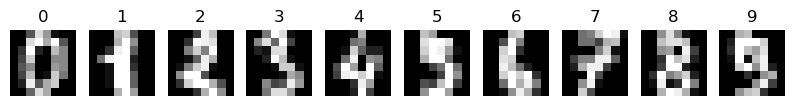

In [23]:
fig, axes = plt.subplots(1, 10, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(X[i].reshape(8, 8), cmap='gray')
    ax.set_title(y[i])
    ax.axis('off')
plt.show()

In [35]:
#2. Reducidr la dimensionalidad con PCA
from sklearn.decomposition import PCA
import numpy as np


In [69]:
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)


In [70]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.preprocessing import StandardScaler


In [71]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


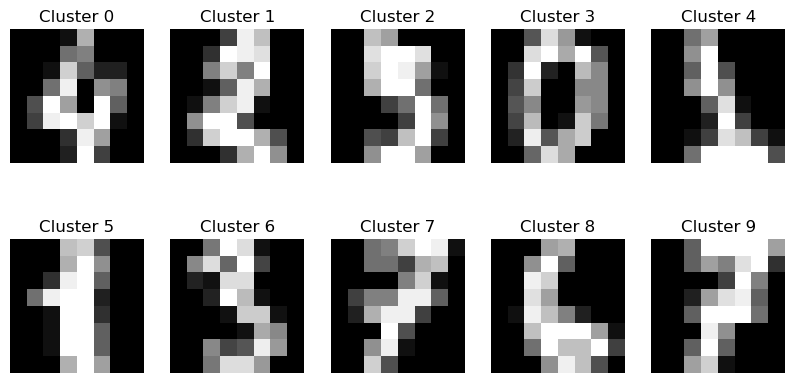

In [72]:
plt.figure(figsize=(10, 5))
#agrupar los dígitos en clústeres y ver cómo se relacionan con sus etiquetas reales
for i in range(10):
    plt.subplot(2, 5, i + 1)
    mask = (clusters == i)
    plt.imshow(X[mask][0].reshape(8, 8), cmap='gray')
    plt.title(f'Cluster {i}')
    plt.axis('off')
plt.show()


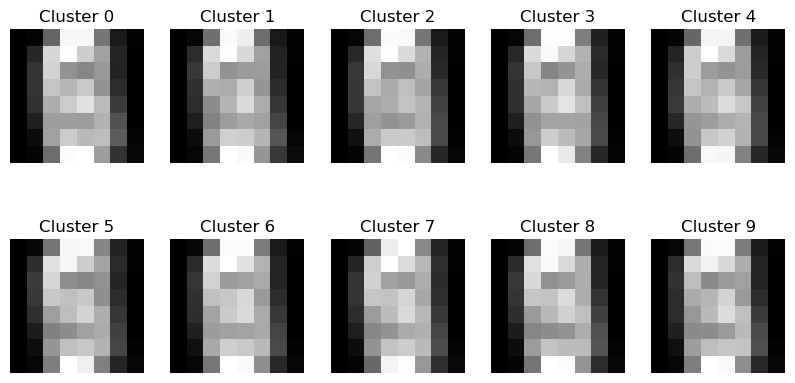

In [67]:
# mostrar los centroides de forma grafica 
plt.figure(figsize=(10, 5))
centers_original_space = pca.inverse_transform(kmeans.cluster_centers_)
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(centers_original_space[i].reshape(8, 8), cmap='gray')
    plt.title(f'Cluster {i}')
    plt.axis('off')
plt.show()